In [1]:
Base.chr2ind(m::IJulia.Msg, str::String, ic::Int64) = Base.chr2ind(m, str, Int32(ic))

# Uniform distribution over the boundary of the cell

In [2]:
using DynamicalBilliards
DynamicalBilliards.enableplotting()

using PyPlot

## Hexagonal cell (Infinite-Horizon regime)

In [40]:
space = 3.0 # Space between two adjacent disks
r = 1.0 # Radius of the disk

polygon_sides = 6

bth = billiard_polygon(polygon_sides, space/sqrt(3); setting = "periodic")
d = Disk([0.,0.], r)
push!(bth, d)

t = 1000.0
Npart = 20000 ;

In [6]:
birkres = birkhoff_visual(t, Npart, bth ,polygon_sides; lyapunov = true);

In [19]:
x = birkres[:,1];
y = birkres[:,2];
distances = birkres[:,3];
lyapunov = birkres[:,4];

## Distances

In [48]:
time = linspace(0.5,20.0,15)

0.5:1.3928571428571428:20.0

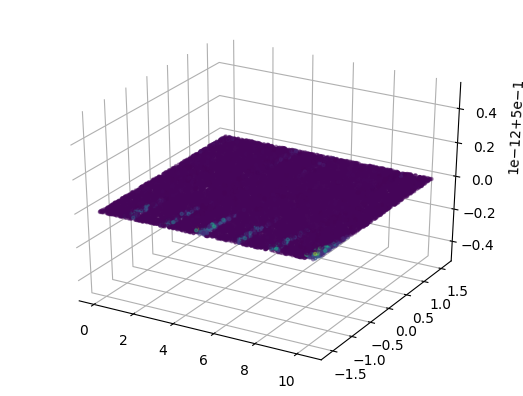

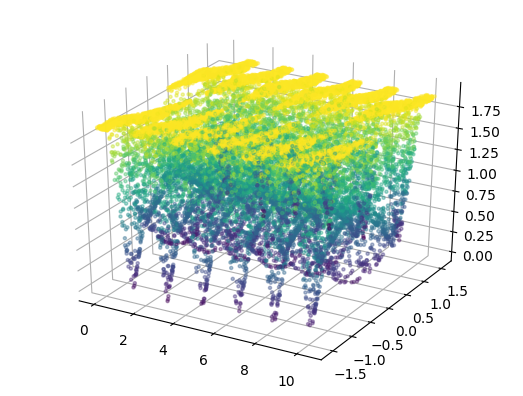

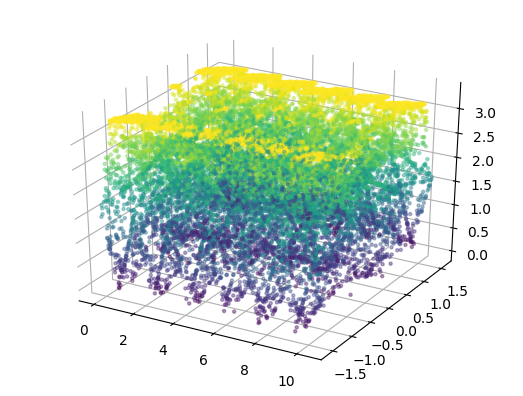

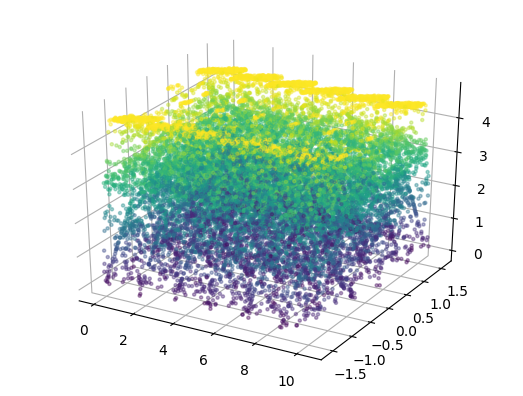

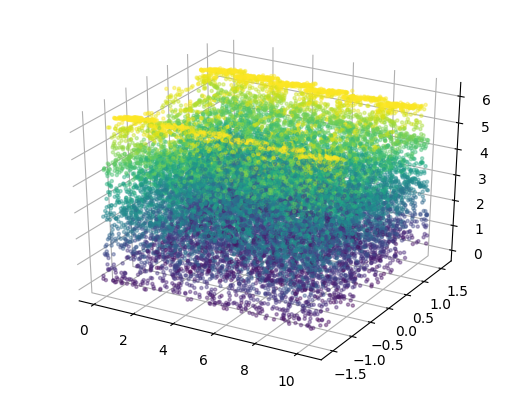

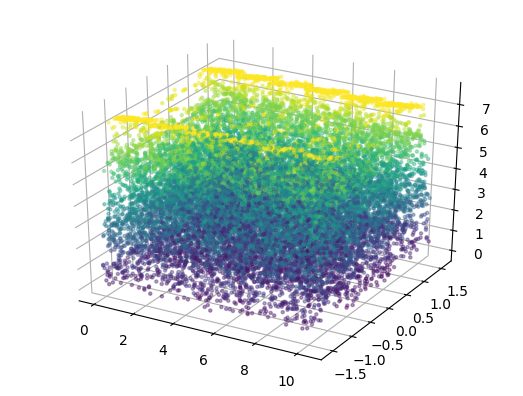

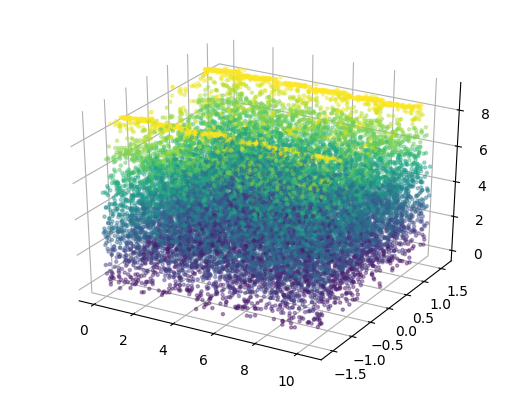

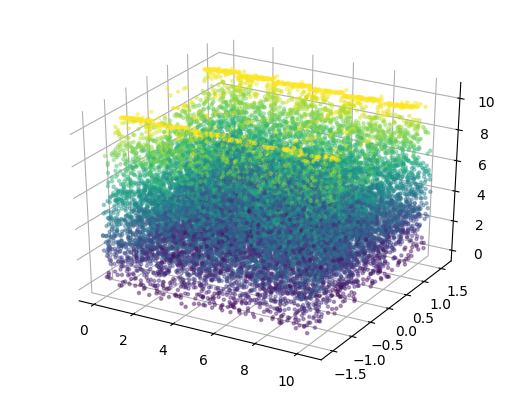

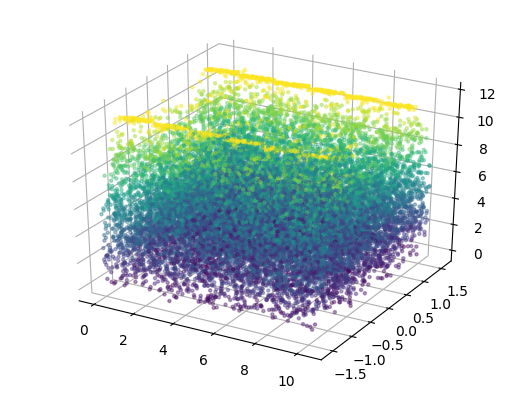

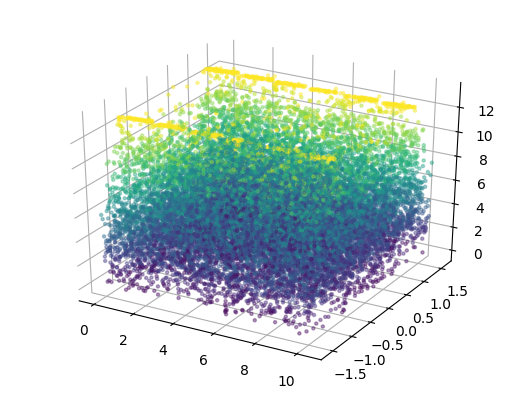

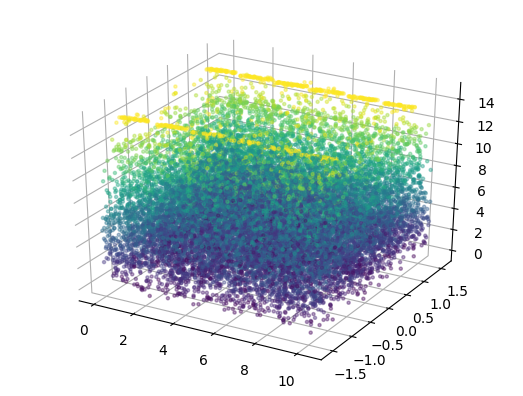

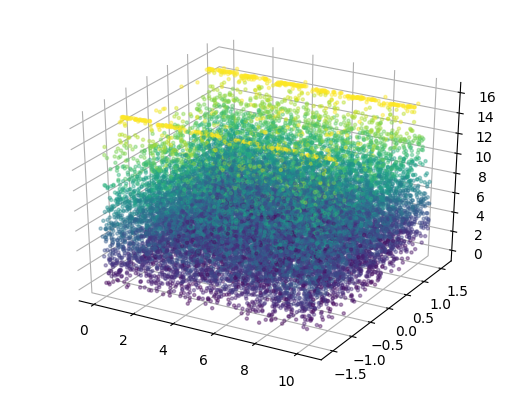

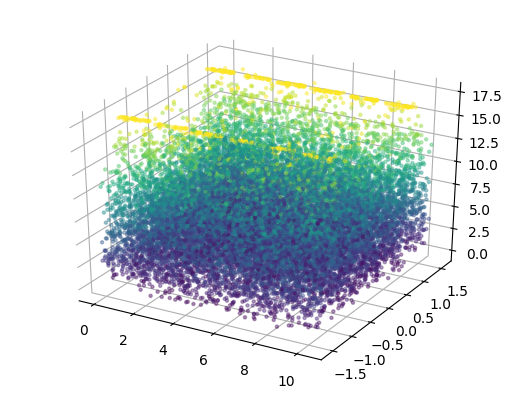

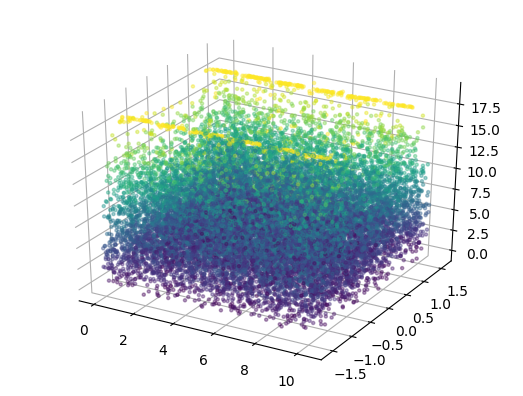

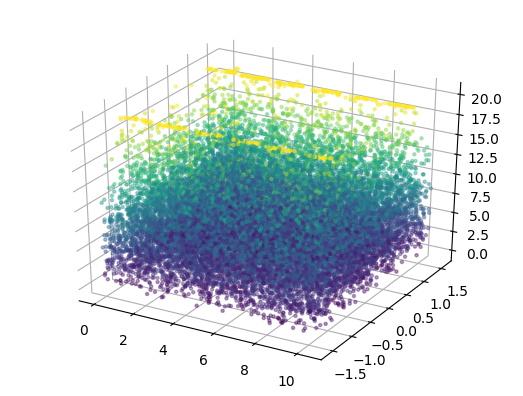

In [49]:
for t in time
Npart = 20000 ;
birkres = birkhoff_visual(t, Npart, bth ,polygon_sides; lyapunov = true);
x = birkres[:,1];
y = birkres[:,2];
distances = birkres[:,3];
lyapunov = birkres[:,4];

## Scatter
fig = plt[:figure]()
ax = fig[:add_subplot](111, projection="3d")
ax[:scatter](birkres[:,1],birkres[:,2], birkres[:,3], c=birkres[:,3], s=5, alpha = 0.4)
ax[:w_xaxis][:set_pane_color]((1.0, 1.0, 1.0, 1.0))
ax[:w_yaxis][:set_pane_color]((1.0, 1.0, 1.0, 1.0))
ax[:w_zaxis][:set_pane_color]((1.0, 1.0, 1.0, 1.0))

end

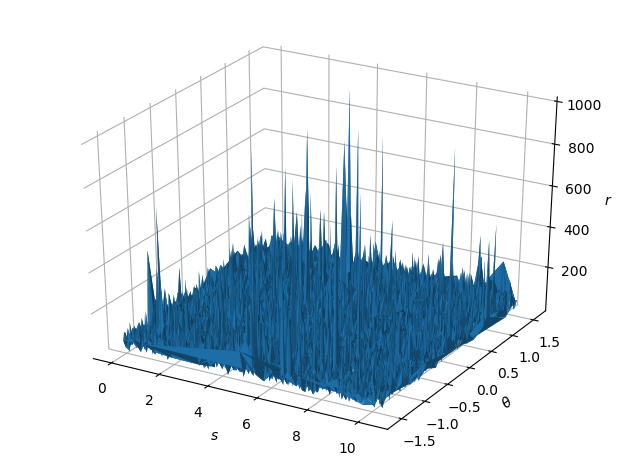

PyObject <matplotlib.text.Text object at 0xd21699ec>

In [18]:
## Density

fig = plt[:figure]()
ax = fig[:add_subplot](111, projection="3d")
surf = ax[:plot_trisurf](x,y,distances)
fig[:tight_layout]()
ax[:w_xaxis][:set_pane_color]((1.0, 1.0, 1.0, 1.0))
ax[:w_yaxis][:set_pane_color]((1.0, 1.0, 1.0, 1.0))
ax[:w_zaxis][:set_pane_color]((1.0, 1.0, 1.0, 1.0))

ax[:set_xlabel](L"$s$")
ax[:set_ylabel](L"$\theta$")
ax[:set_zlabel](L"$r$")

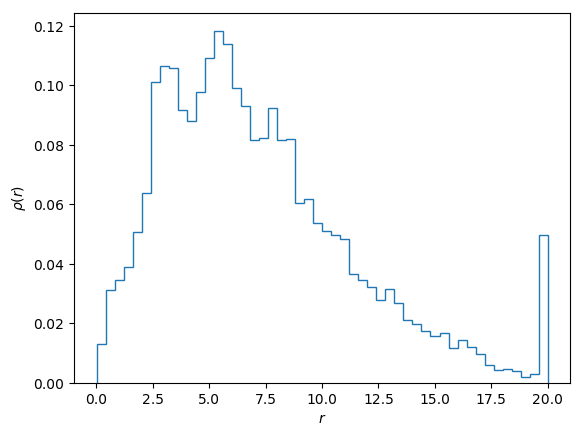

PyObject <matplotlib.text.Text object at 0xabcc412c>

In [51]:
## Histogram
plt[:hist](birkres[:,3], normed = true, 50, histtype = "step");
plt[:xlabel](L"$r$")
plt[:ylabel](L"$\rho(r)$")

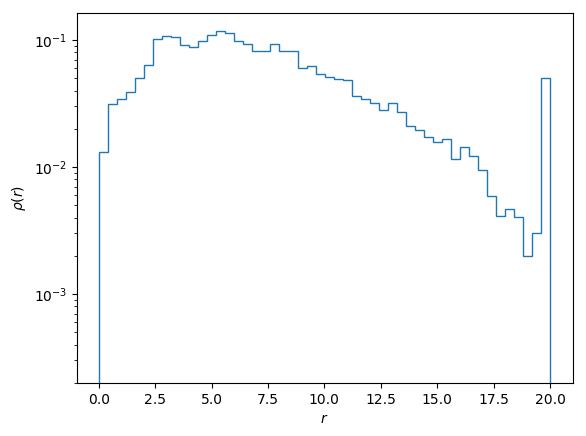

PyObject <matplotlib.text.Text object at 0xabc7388c>

In [52]:
## Histogram -Logarithmic scale
plt[:hist](birkres[:,3], normed = true, 50, histtype = "step", log = true);
plt[:xlabel](L"$r$")
plt[:ylabel](L"$\rho(r)$")

### Lyapunov Exponents

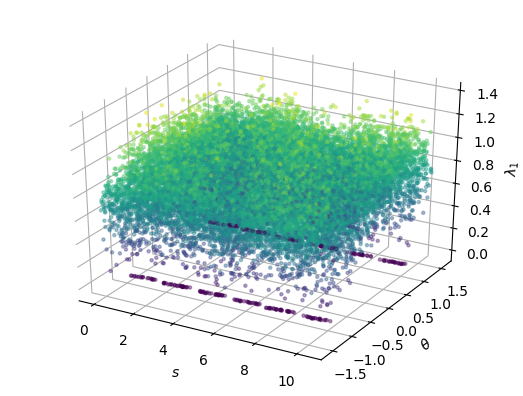

PyObject <matplotlib.text.Text object at 0xaec48ccc>

In [53]:
## Scatter

fig = plt[:figure]()
ax = fig[:add_subplot](111, projection="3d")
ax[:scatter](birkres[:,1],birkres[:,2], birkres[:,4], c=birkres[:,4], s=5, alpha = 0.4)
ax[:w_xaxis][:set_pane_color]((1.0, 1.0, 1.0, 1.0))
ax[:w_yaxis][:set_pane_color]((1.0, 1.0, 1.0, 1.0))
ax[:w_zaxis][:set_pane_color]((1.0, 1.0, 1.0, 1.0))

ax[:set_xlabel](L"$s$")
ax[:set_ylabel](L"$\theta$")
ax[:set_zlabel](L"$\lambda_1$")

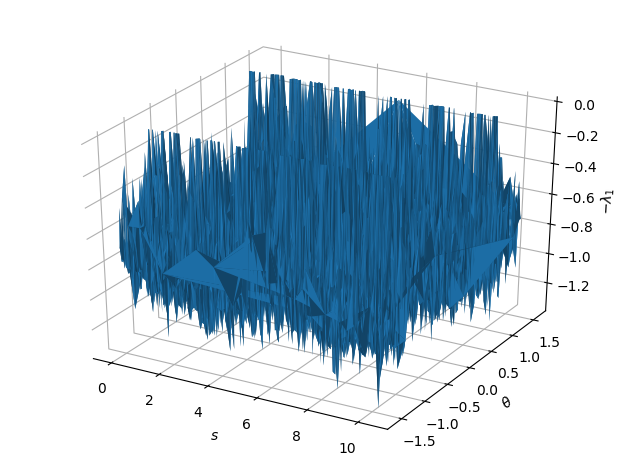

PyObject <matplotlib.text.Text object at 0xaac58b8c>

In [54]:
## Density (-λ_1)

fig = plt[:figure]()
ax = fig[:add_subplot](111, projection="3d")
surf = ax[:plot_trisurf](x,y,-1.*lyapunov, linewidth = 0)
fig[:tight_layout]()
ax[:w_xaxis][:set_pane_color]((1.0, 1.0, 1.0, 1.0))
ax[:w_yaxis][:set_pane_color]((1.0, 1.0, 1.0, 1.0))
ax[:w_zaxis][:set_pane_color]((1.0, 1.0, 1.0, 1.0))

ax[:set_xlabel](L"$s$")
ax[:set_ylabel](L"$\theta$")
ax[:set_zlabel](L"$-\lambda_1$")

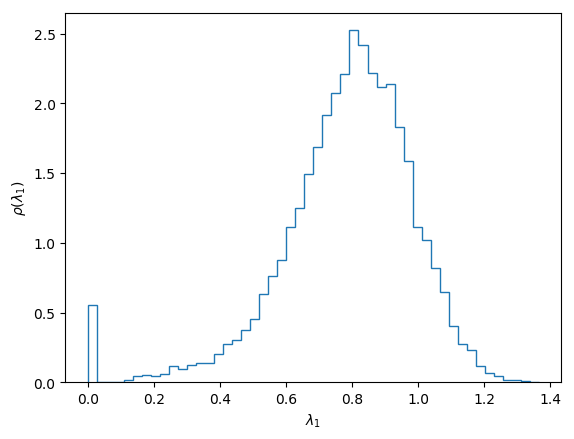

In [55]:
## Histogram
plt[:hist](birkres[:,4], normed = true, 50, histtype = "step");
plt[:xlabel](L"$\lambda_1$")
plt[:ylabel](L"$\rho(\lambda_1)$");


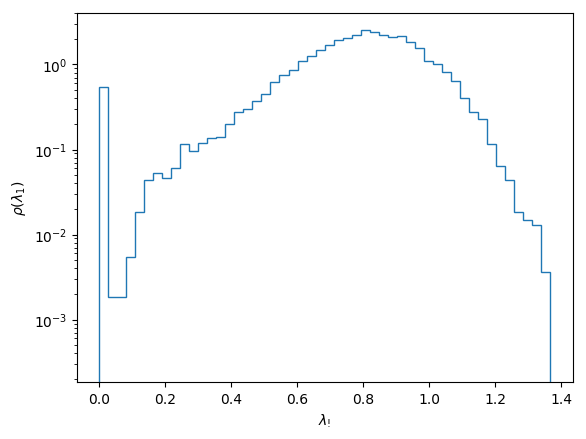

In [56]:
## Histogram
plt[:hist](birkres[:,4], normed = true, 50, histtype = "step", log = true);
plt[:xlabel](L"$\lambda_!$")
plt[:ylabel](L"$\rho(\lambda_1)$");

## Comparison

In [57]:
rare = birkres[find(lyapunov .< 0.1),:] #Distance is the third column

305×4 Array{Float64,2}:
 6.6009     1.05884  20.0  0.0
 4.84655    1.06804  20.0  0.0
 2.1993     1.02719  20.0  0.0
 3.08725    1.05853  20.0  0.0
 6.14559    1.03451  20.0  0.0
 5.78246    1.0531   20.0  0.0
 5.89821    1.05504  20.0  0.0
 3.70139    1.01891  20.0  0.0
 7.93898    1.06362  20.0  0.0
 3.77786    1.03715  20.0  0.0
 2.4275    -1.05873  20.0  0.0
 1.97019    1.02394  20.0  0.0
 3.10692   -1.02688  20.0  0.0
 ⋮                            
 9.93204    1.04402  20.0  0.0
 0.205743   1.0193   20.0  0.0
 2.06857    1.04608  20.0  0.0
 5.90453    1.0402   20.0  0.0
 9.98897   -1.02243  20.0  0.0
 4.14224   -1.06644  20.0  0.0
 2.39211    1.03874  20.0  0.0
 8.34005   -1.02025  20.0  0.0
 5.6082    -1.06141  20.0  0.0
 1.39816   -1.04774  20.0  0.0
 2.74931    1.05002  20.0  0.0
 7.28954   -1.06979  20.0  0.0

We can note that rare events with vanishing Lyapunov exponents have the 
highest values of displacements. It is worth noting that 3 rare values occur at a similar angle

## Hexagonal cell (Finite-Horizon regime)

In [11]:
space = 2.2 # Space between two adjacent disks
r = 1.0 # Radius of the disk

polygon_sides = 6

bth = billiard_polygon(polygon_sides, space/sqrt(3); setting = "periodic")
d = Disk([0.,0.], r)
push!(bth, d)

t = 0.2
Npart = 20000 ;

In [12]:
t = 0.2
Npart = 20000 ;
birkres = birkhoff_visual(t, Npart, bth ,polygon_sides; lyapunov = true);

In [13]:
t = 0.2
Npart = 20000 ;
birkres = birkhoff_visual(t, Npart, bth ,polygon_sides; lyapunov = true);
x = birkres[:,1];
y = birkres[:,2];
distances = birkres[:,3];
lyapunov = birkres[:,4];

## Distances

In [37]:
time = linspace(0.2,10.0,20)

0.2:0.5157894736842106:10.0

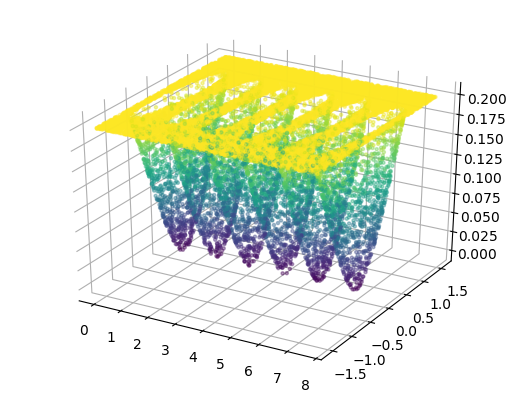

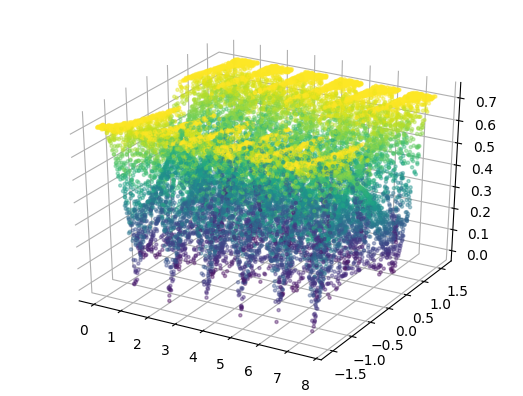

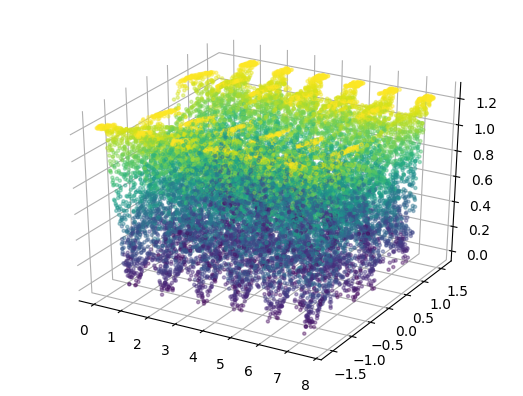

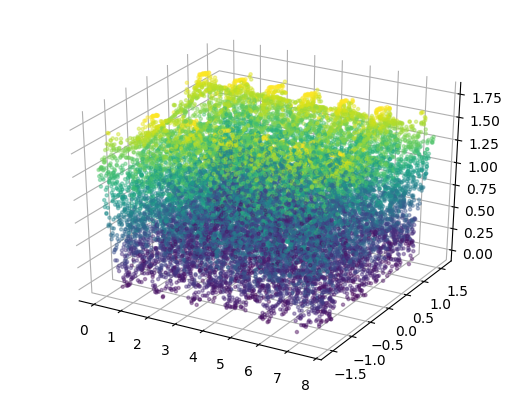

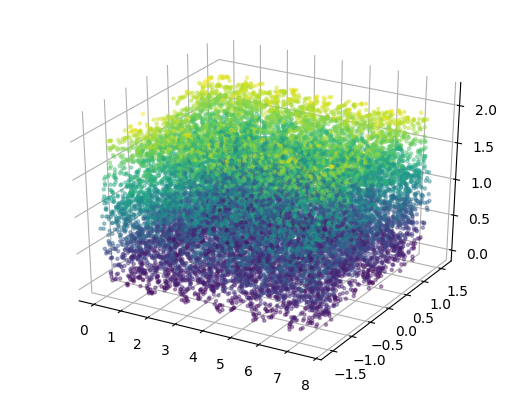

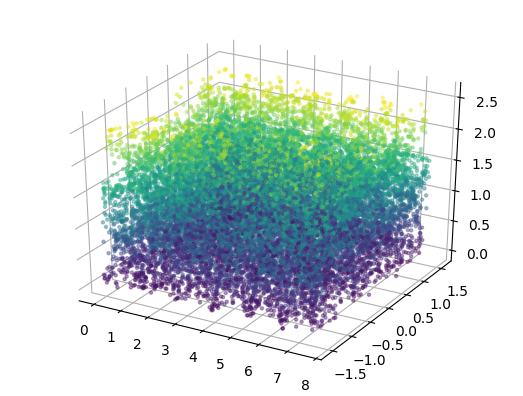

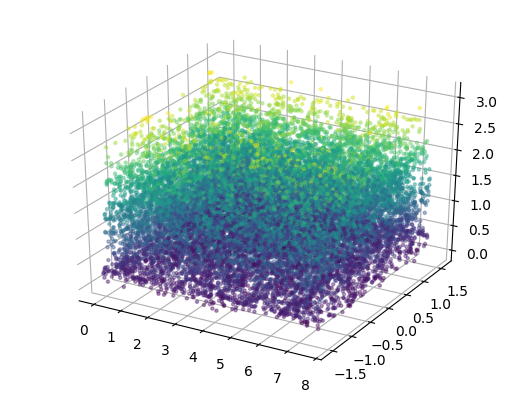

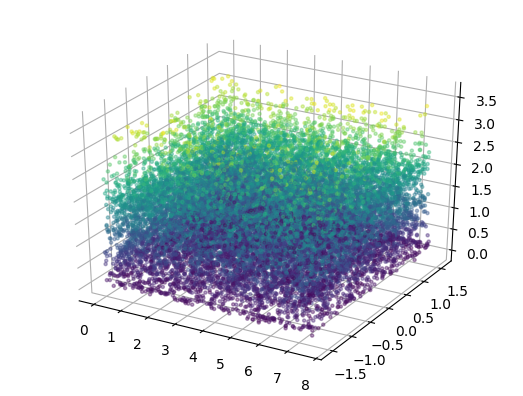

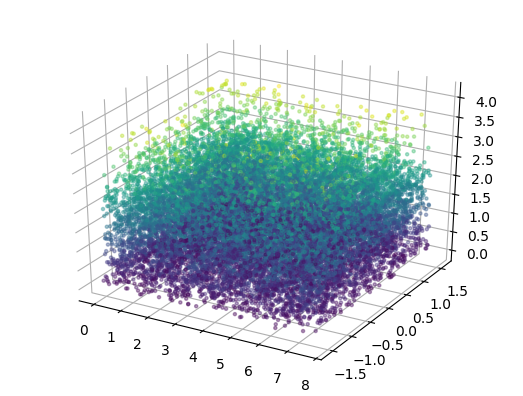

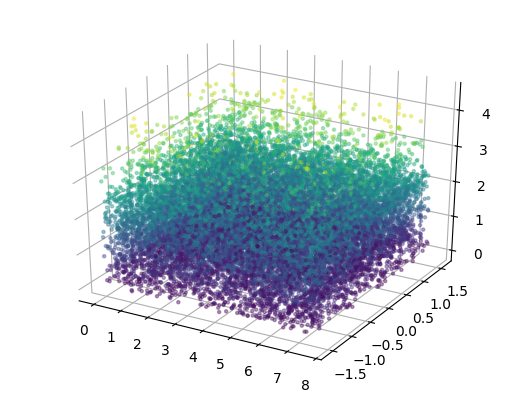

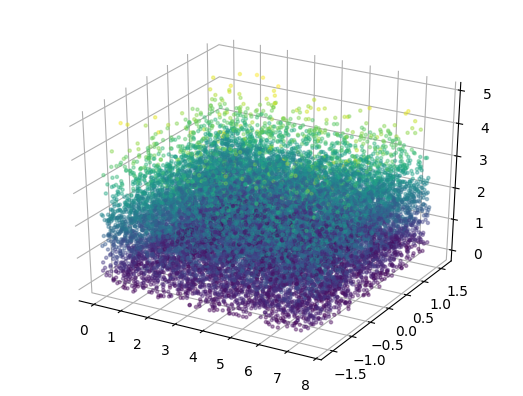

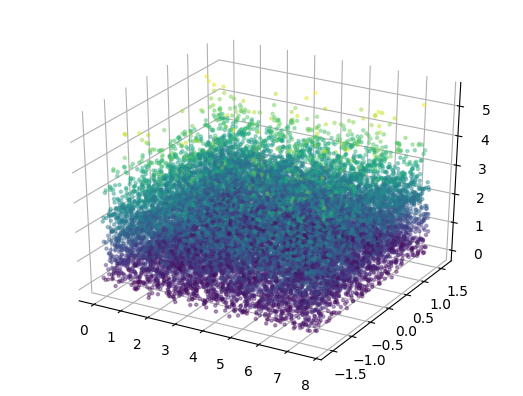

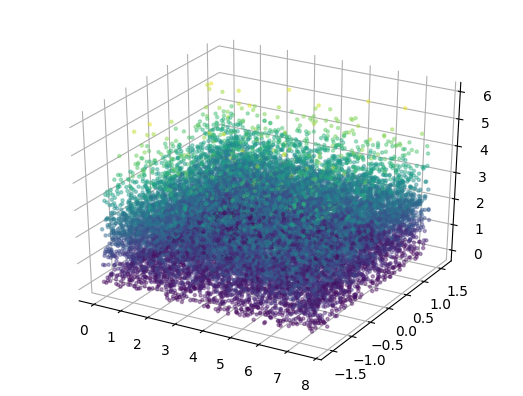

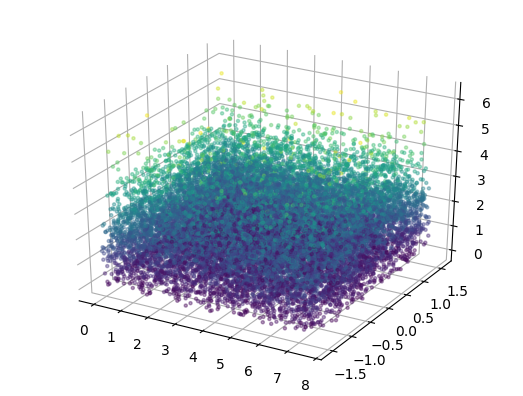

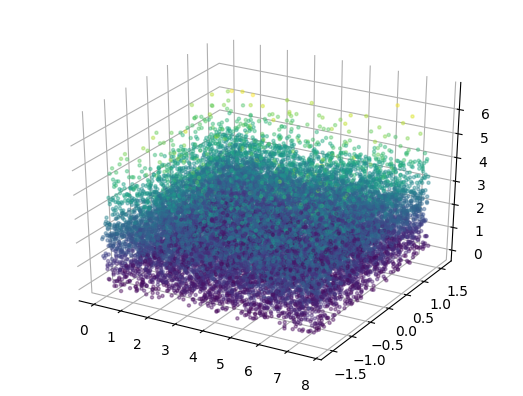

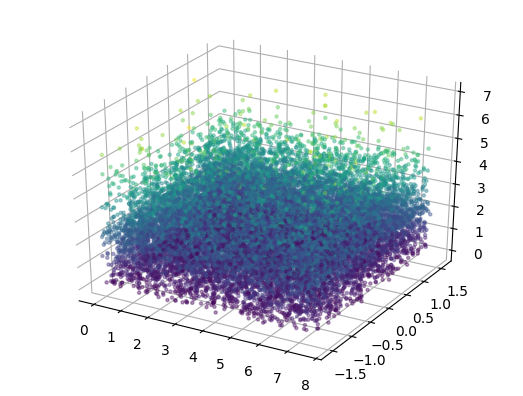

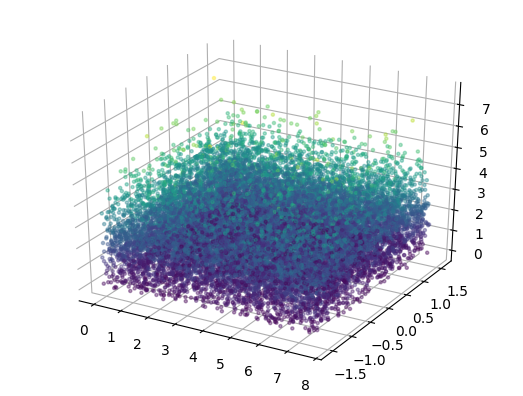

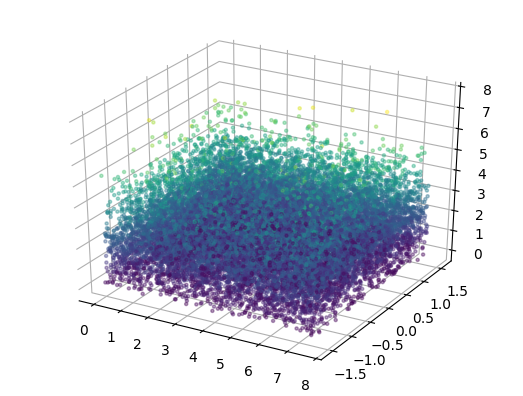

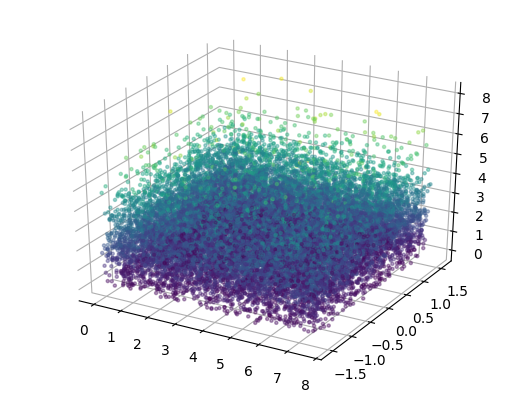

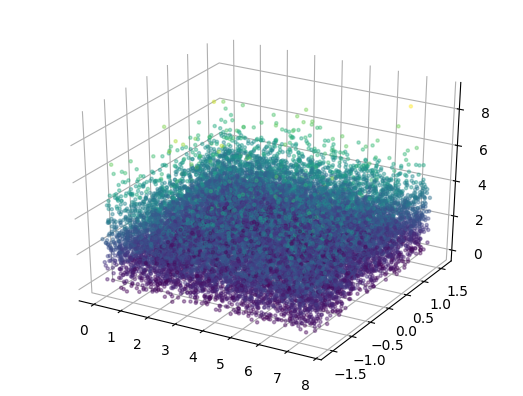

In [38]:
for t in time
Npart = 20000 ;
birkres = birkhoff_visual(t, Npart, bth ,polygon_sides; lyapunov = true);
x = birkres[:,1];
y = birkres[:,2];
distances = birkres[:,3];
lyapunov = birkres[:,4];

## Scatter
fig = plt[:figure]()
ax = fig[:add_subplot](111, projection="3d")
ax[:scatter](birkres[:,1],birkres[:,2], birkres[:,3], c=birkres[:,3], s=5, alpha = 0.4)
ax[:w_xaxis][:set_pane_color]((1.0, 1.0, 1.0, 1.0))
ax[:w_yaxis][:set_pane_color]((1.0, 1.0, 1.0, 1.0))
ax[:w_zaxis][:set_pane_color]((1.0, 1.0, 1.0, 1.0))

end

In [16]:
find(minimum(distances))

1-element Array{Int32,1}:
 1

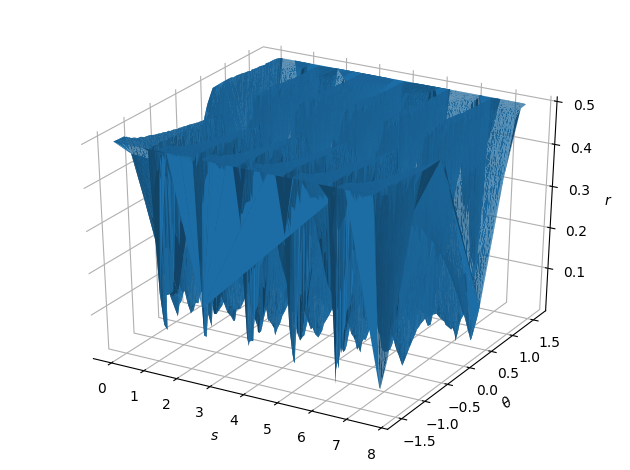

PyObject <matplotlib.text.Text object at 0xd34fc16c>

In [7]:
## Density

fig = plt[:figure]()
ax = fig[:add_subplot](111, projection="3d")
surf = ax[:plot_trisurf](x,y,distances)
fig[:tight_layout]()
ax[:w_xaxis][:set_pane_color]((1.0, 1.0, 1.0, 1.0))
ax[:w_yaxis][:set_pane_color]((1.0, 1.0, 1.0, 1.0))
ax[:w_zaxis][:set_pane_color]((1.0, 1.0, 1.0, 1.0))

ax[:set_xlabel](L"$s$")
ax[:set_ylabel](L"$\theta$")
ax[:set_zlabel](L"$r$")

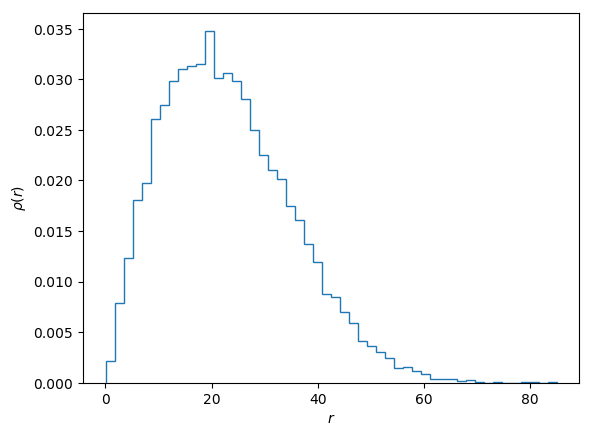

PyObject <matplotlib.text.Text object at 0xc9dabf6c>

In [11]:
## Histogram
plt[:hist](birkres[:,3], normed = true, 50, histtype = "step");
plt[:xlabel](L"$r$")
plt[:ylabel](L"$\rho(r)$")

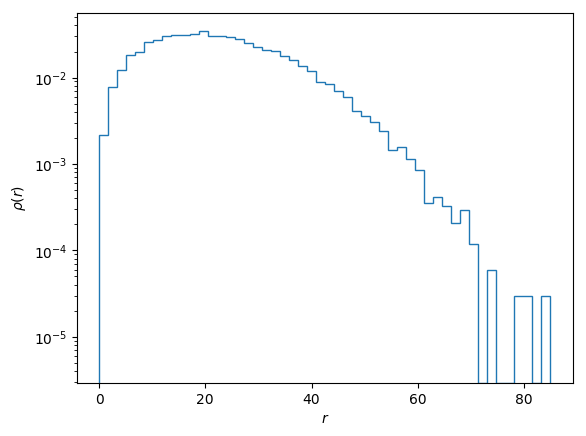

PyObject <matplotlib.text.Text object at 0xcba41cac>

In [12]:
## Histogram -Logarithmic scale
plt[:hist](birkres[:,3], normed = true, 50, histtype = "step", log = true);
plt[:xlabel](L"$r$")
plt[:ylabel](L"$\rho(r)$")

### Lyapunov Exponents

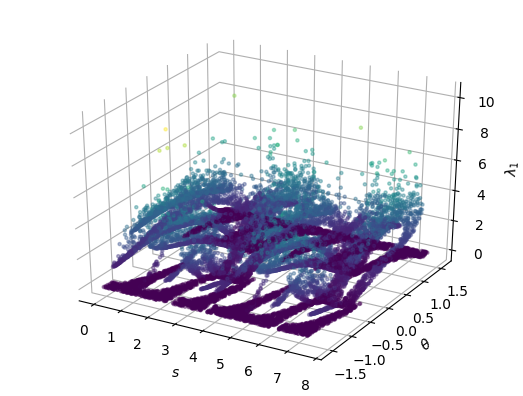

PyObject <matplotlib.text.Text object at 0xcf0b336c>

In [12]:
## Scatter

fig = plt[:figure]()
ax = fig[:add_subplot](111, projection="3d")
ax[:scatter](birkres[:,1],birkres[:,2], birkres[:,4], c=birkres[:,4], s=5, alpha = 0.4)
ax[:w_xaxis][:set_pane_color]((1.0, 1.0, 1.0, 1.0))
ax[:w_yaxis][:set_pane_color]((1.0, 1.0, 1.0, 1.0))
ax[:w_zaxis][:set_pane_color]((1.0, 1.0, 1.0, 1.0))

ax[:set_xlabel](L"$s$")
ax[:set_ylabel](L"$\theta$")
ax[:set_zlabel](L"$\lambda_1$")

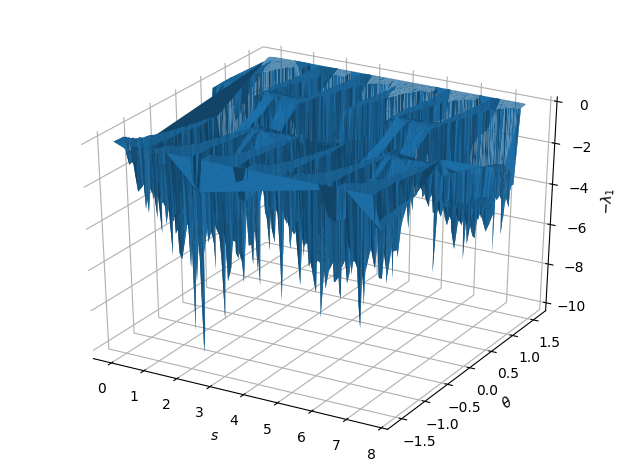

PyObject <matplotlib.text.Text object at 0xd0f5b28c>

In [11]:
## Density (-λ_1)

fig = plt[:figure]()
ax = fig[:add_subplot](111, projection="3d")
surf = ax[:plot_trisurf](x,y,-1.*lyapunov, linewidth = 0)
fig[:tight_layout]()
ax[:w_xaxis][:set_pane_color]((1.0, 1.0, 1.0, 1.0))
ax[:w_yaxis][:set_pane_color]((1.0, 1.0, 1.0, 1.0))
ax[:w_zaxis][:set_pane_color]((1.0, 1.0, 1.0, 1.0))

ax[:set_xlabel](L"$s$")
ax[:set_ylabel](L"$\theta$")
ax[:set_zlabel](L"$-\lambda_1$")

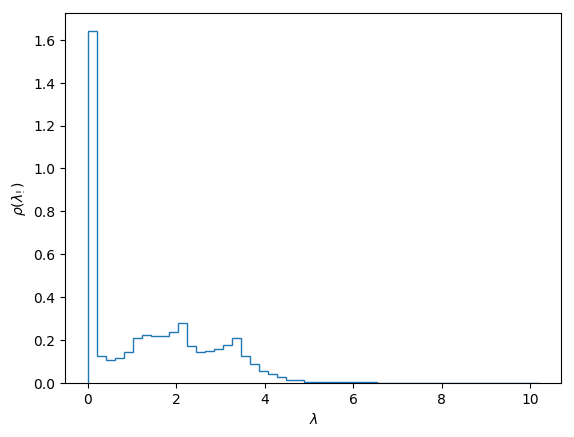

In [8]:
## Histogram
plt[:hist](birkres[:,4], normed = true, 50, histtype = "step");
plt[:xlabel](L"$\lambda$")
plt[:ylabel](L"$\rho(\lambda_!)$");


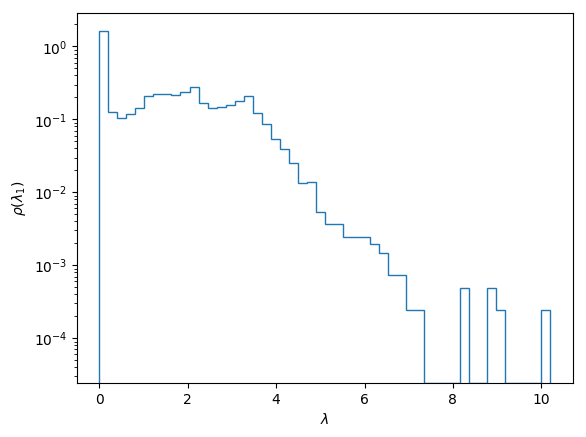

In [10]:
## Histogram
plt[:hist](birkres[:,4], normed = true, 50, histtype = "step", log = true);
plt[:xlabel](L"$\lambda$")
plt[:ylabel](L"$\rho(\lambda_1)$");

## Comparison

In [18]:
rare = birkres[find(lyapunov .< 1.0),:] #Distance is the third column

0×4 Array{Float64,2}

We can note that rare events with vanishing Lyapunov exponents have the 
highest values of displacements. It is worth noting that 3 rare values occur at a similar angle